In [ ]:
#geral
import pandas as pd
import numpy as np

#sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#visual
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# monta o google drive
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Mineração de Dados/data/all_data.csv')

In [ ]:
df

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till a...,train,2017-03-06 15:21:53.675241+00,21,NaN,317120,approved,0,0,0,2,0,0.373134,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,67
1,650904,Mad dog will surely put the liberals in mental...,train,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,1,2,0,0.605263,0.013158,0.065789,0.013158,0.092105,0.565789,0.065789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
2,5902188,And Trump continues his lifelong cowardice by ...,train,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,2,3,7,0.666667,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63
3,7084460,"""while arresting a man for resisting arrest"".\...",test,2016-11-01 16:53:33.561631+00,13,NaN,149218,approved,0,0,0,0,0,0.815789,0.065789,0.552632,0.592105,0.000000,0.684211,0.105263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
4,5410943,Tucker and Paul are both total bad ass mofo's.,train,2017-06-14 05:08:21.997315+00,21,NaN,344096,approved,0,0,0,1,0,0.550000,0.037500,0.337500,0.275000,0.037500,0.487500,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999511,1018736,Another man shamming article. If white men did...,train,2017-02-20 07:20:49.964620+00,54,NaN,169202,approved,0,0,0,2,0,0.400000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.700000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,10,10
1999512,340016,"""no matter what is put in front of you regardi...",train,2016-06-06 06:43:04.780968+00,21,339965.0,137961,approved,0,0,0,1,0,0.400000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.600000,0.000000,0.800000,0.000000,0.0,0.100000,0.00000,0.100000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,10,10
1999513,919629,The Democrat party aided and abetted by it's M...,train,2017-01-30 02:44:29.168863+00,54,NaN,164845,rejected,0,1,0,3,2,0.400000,0.000000,0.200000,0.100000,0.300000,0.300000,0.000000,0.000000,0.363636,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,11,10
1999514,5165492,I just don't find her a very good representati...,train,2017-04-22 18:42:02.442987+00,54,NaN,328877,approved,1,0,0,3,0,0.400000,0.000000,0.000000,0.000000,0.200000,0.100000,0.000000,0.000000,0.141264,0.765799,0.052045,0.0,0.033457,0.01487,0.256506,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003717,0.0,0.0,0.00000,269,10


In [ ]:
# import pickle
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.utils import shuffle

# under = RandomUnderSampler()
# X, y = under.fit_resample(np.array(df.comment_text).reshape(-1,1), np.array(df.toxicity >= 0.5).reshape(-1,1))
# balanced_df = pd.DataFrame(list(zip(X.flatten(), y)), columns=["comment_text", "toxicity"])
# balanced_df = shuffle(balanced_df).reset_index()[["comment_text", "toxicity"]]
# pickle.dump(balanced_df, open('/content/drive/Shareddrives/Mineração de Dados/modelos/sav/balanced_df.sav', 'wb'))
# balanced_df.head()

,comment_text,toxicity
0,No. That is totally different. In auto insuran...,False
1,1 He is a clown.\n2 It's a hate site\n3 anybod...,True
2,"Pence's ""Christianity"" turned a blind eye to ...",True
3,"Sorry, but you are dead wrong about the medica...",False
4,Agree completely with other posters that the g...,True


In [ ]:
df.describe()

,id,publication_id,parent_id,article_id,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
count,1.999516e+06,1.999516e+06,1.134709e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,448000.000000,1.999516e+06,1.999516e+06
mean,4.065400e+06,4.988997e+01,3.715138e+06,2.810257e+05,2.776687e-01,4.437174e-02,1.089289e-01,2.441188e+00,5.808151e-01,1.029241e-01,4.580563e-03,1.389045e-02,6.562431e-03,2.254899e-02,8.113795e-02,9.280932e-03,0.108047,0.126651,0.006712,0.000882,0.003248,0.025378,0.001893,0.001492,0.095184,0.017910,0.049078,0.001443,0.001393,0.003468,0.006718,0.034275,0.056534,0.011886,0.006151,0.008158,0.001351,0.001117,0.012068,0.001219,1.431667e+00,8.775720e+00
std,2.527563e+06,2.771895e+01,2.451507e+06,1.040778e+05,1.054819e+00,2.458644e-01,4.555570e-01,4.712994e+00,1.854332e+00,1.970386e-01,2.285760e-02,6.466376e-02,4.511177e-02,7.854022e-02,1.760993e-01,4.933784e-02,0.267147,0.304268,0.068964,0.011825,0.046075,0.143058,0.026208,0.015380,0.256609,0.122281,0.201705,0.030681,0.030688,0.052579,0.037318,0.167631,0.215175,0.086906,0.058828,0.042429,0.017461,0.016391,0.089072,0.014114,1.763593e+01,4.331605e+01
min,5.984800e+04,2.000000e+00,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.000000e+00
25%,8.565798e+05,2.100000e+01,7.930110e+05,1.600038e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4.000000e+00
50%,5.340220e+06,5.400000e+01,5.217531e+06,3.319250e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4.000000e+00
75%,5.955782e+06,5.400000e+01,5.774684e+06,3.662270e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.456672e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
max,7.194640e+06,1.150000e+02,6.333965e+06,3.995440e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00

In [ ]:
df.isnull().sum()

id                                           0
comment_text                                 1
split                                        0
created_date                                 0
publication_id                               0
parent_id                               864807
article_id                                   0
rating                                       0
funny                                        0
wow                                          0
sad                                          0
likes                                        0
disagree                                     0
toxicity                                     0
severe_toxicity                              0
obscene                                      0
sexual_explicit                              0
identity_attack                              0
insult                                       0
threat                                       0
male                                   1551516
female       

In [ ]:
df.dropna(subset=['comment_text', 'toxicity'], inplace=True)
df.dropna(axis='columns', inplace=True)
print(df.shape)
df.isnull().sum()

(1999515, 21)


id                          0
comment_text                0
split                       0
created_date                0
publication_id              0
article_id                  0
rating                      0
funny                       0
wow                         0
sad                         0
likes                       0
disagree                    0
toxicity                    0
severe_toxicity             0
obscene                     0
sexual_explicit             0
identity_attack             0
insult                      0
threat                      0
identity_annotator_count    0
toxicity_annotator_count    0
dtype: int64

In [ ]:
# remove duplicados
df.drop_duplicates(subset=['comment_text', 'toxicity'], keep='first', inplace=True)
df.shape # 1999515 - 1977802 = 21713 duplicados

(1977802, 21)

In [ ]:
# verifica se sobrou algum texto duplicado
df[df.duplicated(subset=['comment_text'])].sort_values('comment_text')

,id,comment_text,split,created_date,publication_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,identity_annotator_count,toxicity_annotator_count
597031,284991,""" Just another reminder that people are genera...",train,2016-04-16 11:39:36.751338+00,21,59974,rejected,0,0,0,0,0,0.862069,0.034483,0.241379,0.000000,0.034483,0.862069,0.000000,0,58
593272,284992,""" Just another reminder that people are genera...",train,2016-04-16 11:40:48.993316+00,21,59974,rejected,0,0,0,0,0,0.795918,0.081633,0.102041,0.020408,0.040816,0.795918,0.000000,0,49
1978162,6329016,""" Mr. Drumpf's speech before the Asian Pacific...",train,2017-11-10 14:17:38.602848+00,102,399242,approved,0,0,0,7,0,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,10,6
1838378,1001144,""" Turner had a long list of past driving offen...",train,2017-02-16 03:09:33.138202+00,21,168468,approved,0,0,0,4,0,0.400000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0,10
396292,7029924,""" new board members holding more diverse views...",test,2017-11-01 05:19:55.922801+00,102,395697,rejected,0,0,0,0,0,0.721311,0.049180,0.098361,0.000000,0.081967,0.704918,0.000000,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464781,6110236,…people who denigrate any American's right to ...,train,2017-10-09 06:34:44.020814+00,21,386902,approved,1,0,0,1,0,1.000000,0.000000,0.166667,0.000000,0.166667,1.000000,0.000000,0,6
1552559,5557982,‪Please sign petition for US President Trump t...,train,2017-07-09 06:51:20.618974+00,54,353067,approved,0,0,2,2,0,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0,6
1447912,7161185,══════════★●°●°●°●°●°●°●★ \n+ᴍʏ Fʀɪᴇɴᴅ's ᴍᴏᴍ ᴍ...,test,2016-05-25 09:32:02.671270+00,21,131670,rejected,0,0,0,1,0,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,6
1401330,355302,"★★★\nI’ve made $64,000 so far this year w0rkin...",train,2016-06-18 09:46:25.574728+00,21,139085,rejected,0,0,0,1,0,0.166667,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0,6


In [ ]:
df[df.comment_text == '🏆']	

,id,comment_text,split,created_date,publication_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,identity_annotator_count,toxicity_annotator_count
722163,7136664,🏆,test,2017-01-04 18:45:37.263893+00,53,159299,approved,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10
1342829,822822,🏆,train,2017-01-11 10:04:39.329140+00,53,160842,approved,0,0,0,1,1,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0,10


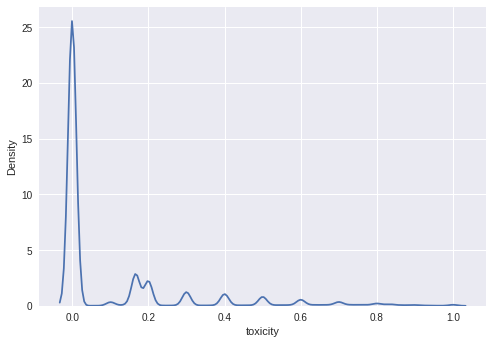

In [ ]:
sns.kdeplot(df.toxicity)

In [ ]:
# linhas com toxicidade exatamente 0.5
len(df[df.toxicity == 0.5])

41907

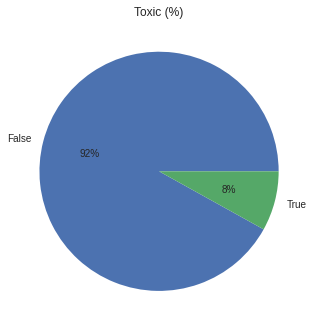

In [ ]:
plt.style.use('seaborn')
#create pie chart
count_toxic = (df.toxicity >= 0.5).value_counts()
plt.pie(count_toxic, labels=count_toxic.index, autopct='%.0f%%')
plt.title("Toxic (%)")
plt.show()

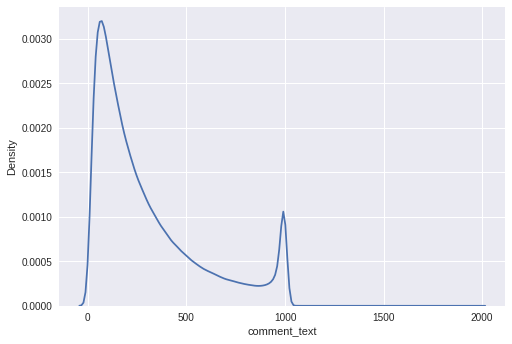

In [ ]:
sns.kdeplot(df.comment_text.str.len())

In [ ]:
df[df.comment_text.str.len() > 1000]

,id,comment_text,split,created_date,publication_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,identity_annotator_count,toxicity_annotator_count
19778,7179859,"I'm not a big fan of either, but I've seen bot...",test,2015-10-06 17:30:14.842195+00,111,32830,approved,0,0,0,0,0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0,4
339700,240018,"Predatory patrol towing isn't a big subject, a...",train,2016-01-21 01:15:53.542889+00,6,32581,approved,0,0,0,1,0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0,4
534735,243364,As usual WW plumbing the depths for deeper mea...,train,2016-02-11 21:17:58.673290+00,6,38015,approved,0,0,0,1,0,0.125,0.0,0.0,0.0,0.0,0.125,0.0,4,8
662670,383755,I always find the Star Wars/Star Trek debate f...,train,2015-09-29 20:15:31.985710+00,25,141164,approved,0,0,0,1,0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0,4
838424,7048987,"Richard Ellmyer - I think most sane, patriotic...",test,2016-01-16 17:19:26.705977+00,6,30019,approved,0,0,0,1,0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0,4
895349,239854,"Am I missing something, because there's nothin...",train,2016-01-18 16:32:01.444520+00,6,30130,approved,0,0,0,0,0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0,4
1115853,239918,Do not so readily suppose that people coming o...,train,2016-01-20 05:40:25.143689+00,6,32123,approved,0,0,0,2,0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0,4
1265761,7068872,Part 2 of 2\n\nIf and when the Bundy bunch lea...,test,2016-01-16 01:38:41.711163+00,6,30019,approved,0,0,0,0,0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0,4
1470575,7022327,"This makes me annoyed: ""Yet Portland spends mo...",test,2016-01-20 23:29:54.260942+00,6,32389,approved,0,0,0,2,0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,4,4


In [ ]:
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer()
vectorizer = CountVectorizer(analyzer='word', tokenizer=tknzr.tokenize)

In [ ]:
df.comment_text = df.comment_text.replace('\xad', '', regex=True)  # remove os caracteres \xad que aparecem em alguns spams
df['tokenized_text'] = df.comment_text.apply(tknzr.tokenize)

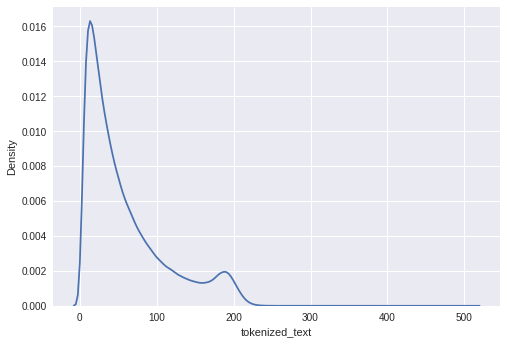

In [ ]:
sns.kdeplot(df['tokenized_text'].apply(len))

In [ ]:
df[df['tokenized_text'].apply(len) > 300].iloc[7].comment_text

'Local candidate #1...\n┈┈┈┈┈┈┈┈┈┈┈?????????????\n┈┈╱▔▔▔▔▔╲┈┈┈??????????\n┈╱┈┈╱▔╲╲╲▏┈┈┈?????┈\n╱┈┈╱━╱▔▔▔▔▔╲━╮┈┈\n▏┈▕┃▕╱▔╲╱▔╲▕╮┃┈┈\n▏┈▕╰━▏▊▕▕▋▕▕━╯┈┈\n╲┈┈╲╱▔╭╮▔▔┳╲╲┈┈┈\n┈╲┈┈▏╭━━━━╯▕▕┈┈┈\n┈┈╲┈╲▂▂▂▂▂▂╱╱┈┈┈\n┈┈┈┈▏┊┈┈┈┈┊┈┈┈╲┈\n┈┈┈┈▏┊┈┈┈┈┊▕╲┈┈╲\n┈╱▔╲▏┊┈┈┈┈┊▕╱▔╲▕\n┈▏┈┈┈╰┈┈┈┈╯┈┈┈▕▕\n┈╲┈┈┈╲┈┈┈┈╱┈┈┈╱┈╲\n┈┈╲┈┈▕▔▔▔▔▏┈┈╱╲╲╲▏\n┈╱▔┈┈▕┈┈┈┈▏┈┈▔╲▔▔\n┈╲▂▂▂╱┈┈┈┈╲▂▂▂╱┈\n\nMainland candidate #1...\n┈┈┈┈┈┈┈┈┈┈┈?????????????\n┈┈╱▔▔▔▔▔╲┈┈┈??????????\n┈╱┈┈╱▔╲╲╲▏┈┈┈?????┈\n╱┈┈╱━╱▔▔▔▔▔╲━╮┈┈\n▏┈▕┃▕╱▔╲╱▔╲▕╮┃┈┈\n▏┈▕╰━▏▊▕▕▋▕▕━╯┈┈\n╲┈┈╲╱▔╭╮▔▔┳╲╲┈┈┈\n┈╲┈┈▏╭━━━━╯▕▕┈┈┈\n┈┈╲┈╲▂▂▂▂▂▂╱╱┈┈┈\n┈┈┈┈▏┊┈┈┈┈┊┈┈┈╲┈\n┈┈┈┈▏┊┈┈┈┈┊▕╲┈┈╲\n┈╱▔╲▏┊┈┈┈┈┊▕╱▔╲▕\n┈▏┈┈┈╰┈┈┈┈╯┈┈┈▕▕\n┈╲┈┈┈╲┈┈┈┈╱┈┈┈╱┈╲\n┈┈╲┈┈▕▔▔▔▔▏┈┈╱╲╲╲▏\n┈╱▔┈┈▕┈┈┈┈▏┈┈▔╲▔▔\n┈╲▂▂▂╱┈┈┈┈╲▂▂▂╱┈\n\nPick your choice! LOL'